In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


14주 이진 베이지안 모델
Sklearn의 make_classification() 함수는 분류에 쓰일 수 있는 데이터를 생성해준다.



from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)



Sklearn으로 이진 베이지안 모델링을 해보자.

* (1) X, Y 데이터를 생성

* (2) X의 평균과 표준편차 계산해서 출력

* (3) 그래프 작성

    * scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.

* (4) 훈련데이터, 테스트데이터 3:1로 분리

    * train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.

* (5) 훈련데이터에 대하여 BernoulliNB 모델링

    * X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.

* (6) 테스트데이터에 대하여 예측값을 출력

    * 예측이 맞는지 실제값 Y와 비교해보자.

* (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력



## (1) X, Y 데이터를 생성

In [2]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [3]:
print(X.shape)
print(X[:3])

print(Y.shape)
print(Y[:3]) #1또는0 이진

(100, 2)
[[-1.17185216 -1.27916989]
 [ 0.79856213  0.94174273]
 [-0.87155801  1.87680035]]
(100,)
[0 1 0]


(2) X의 평균과 표준편차 계산해서 출력

In [4]:
print('평균: ',X.mean())
print('표준편차:', X.std())

평균:  0.06578632079923993
표준편차: 1.2031253184604018


(3) 그래프 작성

Text(0, 0.5, 'X[:,1]')

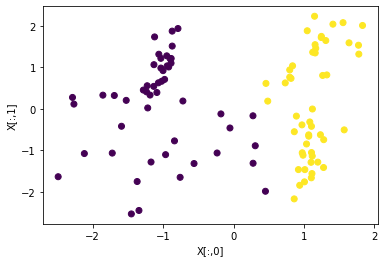

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')

(4) 훈련데이터, 테스트데이터 3:1로 분리

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=41)

(5) 훈련데이터에 대하여 BernoulliNB 모델링

In [7]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(binarize=0.0)
clf.fit(X_train, Y_train)

BernoulliNB()

(6) 테스트데이터에 대하여 예측값을 출력
 * 예측이 맞는지 실제값 Y와 비교해보자.

In [8]:
clf.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0])

In [10]:
import pandas as pd
df=pd.DataFrame({'Predict':clf.predict(X_test),'Y_test':Y_test})
df['result']=(df['Predict']==df['Y_test'])
print(df)

    Predict  Y_test  result
0         0       0    True
1         1       1    True
2         1       1    True
3         0       0    True
4         0       0    True
5         0       0    True
6         0       0    True
7         0       0    True
8         1       1    True
9         1       1    True
10        0       0    True
11        1       1    True
12        1       1    True
13        0       0    True
14        1       1    True
15        0       0    True
16        1       1    True
17        0       0    True
18        0       0    True
19        1       1    True
20        0       0    True
21        0       0    True
22        0       0    True
23        0       0    True
24        0       0    True


In [11]:
df[df['result']==False]

,Predict,Y_test,result


(7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

In [12]:
clf.score(X_test,Y_test)

1.0